# Coronavirus Simulation

## Initialization

Import the required libraries.

In [20]:
%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
from modsim import *
import random
import statistics
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

np.random.seed(7)

Initialize the coronavirus state object

In [40]:
coronavirus = State(dead=0, recovered=0, infected=1, not_infected=0, total=0)

,values
dead,0
recovered,0
infected,1
not_infected,0
total,0


Initialize the TimeSeries objects

In [41]:
not_infected = TimeSeries()
infected = TimeSeries()
dead = TimeSeries()
recovered = TimeSeries()

,values


## Declaration

Declare the infect function.

In [23]:
def infect(infect_prob):
    if coronavirus.total > 0:
        if flip(infect_prob):
            coronavirus.infected += 1
            coronavirus.not_infected -= 1
        coronavirus.total -= 1

Declare the infect_step function.

In [24]:
def infected_step():
    death_prob = 0.0007
    recover_prob = 0.3
    if flip(death_prob):
        coronavirus.dead += 1
        coronavirus.infected -= 1
    else:
        if flip(recover_prob):
            coronavirus.recovered += 1
            coronavirus.not_infected += 1
            coronavirus.infected -= 1

Declare the day_pass function.

In [25]:
def day_pass(infectable_persons, infect_prob, day):
    for i in range(infectable_persons):
        infect(infect_prob)
    if (day >= 5):
        if coronavirus.infected > 1:
            rangeNumber = int(coronavirus.infected * random.random())
            for i in range(rangeNumber):
                infected_step()

Declare the calculate_infect_prob function.

In [39]:
def calculate_infect_prob(initial_infect_prob, vaccine_percentage):
    new_infect_prob = initial_infect_prob - vaccine_percentage
    return new_infect_prob

Declare the draw function.

In [27]:
def draw():
    fig = plt.figure(figsize=(30,10))
    
    plt.subplot2grid((2,3),(0,0))
    orange_line = mlines.Line2D([], [], color='orange', label='Infected')
    blue_line = mlines.Line2D([], [], color='blue', label='Not infected')
    red_line = mlines.Line2D([], [], color='red', label='Dead')
    green_line = mlines.Line2D([], [], color='green', label='Recovered')
    plt.legend(handles=[orange_line, blue_line, red_line, green_line], loc='upper right')
    plt.plot(infected, color='orange')
    plt.plot(not_infected, color='blue')
    plt.plot(dead, color='red')
    plt.plot(recovered, color='green')
    plt.title('Coronavirus status per day')
    plt.xlabel('Time step (day)') 
    plt.ylabel('Number of persons')
    savefig('figs/chap02-fig01.pdf')
    
    
    plt.subplot2grid((2,3),(0,1))
    orange_line = mlines.Line2D([], [], color='orange', label='Infected')
    blue_line = mlines.Line2D([], [], color='blue', label='Not infected')
    red_line = mlines.Line2D([], [], color='red', label='Dead')
    green_line = mlines.Line2D([], [], color='green', label='Recovered')
    plt.legend(handles=[orange_line, blue_line, red_line, green_line], loc='upper center')
    plt.scatter(infected, infected, color='orange')
    plt.scatter(not_infected, not_infected, color='blue')
    plt.scatter(dead, dead, color='red')
    plt.scatter(recovered, recovered, color='green')
    plt.title('Population Data Dispersion')
    plt.xlabel('Persons')
    plt.ylabel('Persons')
    savefig('figs/chap02-fig02.pdf')

Declare the run simulation function.

In [28]:
def run_simulation(population, infect_prob, relations_per_day, vaccine_percentage):
    coronavirus.total = population
    infectable_persons = relations_per_day
    coronavirus.not_infected = population
    infect_prob = calculate_infect_prob(infect_prob, vaccine_percentage)
    
    pStandardDev = statistics.pstdev([population, infect_prob, relations_per_day])
    standardDev = 'Desviación: ' + repr(pStandardDev)
    print(standardDev)

    day = 1
    while True:
        day_pass(infectable_persons, infect_prob, day)
        infected[day] = coronavirus.infected
        dead[day] = coronavirus.dead
        recovered[day] = coronavirus.recovered
        not_infected[day] = coronavirus.not_infected
        
        
        print('day: ' + str(day) + ', infected: ' + str(coronavirus.infected) + ', dead: ' + str(coronavirus.dead) + ', recovered: ' + str(coronavirus.recovered))
        day += 1
        
        infectable_persons = relations_per_day * coronavirus.infected
        if (coronavirus.infected <= 1):
            break
    draw()

# Run simulation

Run simulation with run_simulation(population, prob, relations). Parameters:
- Population: Quantity of people that can be reached
- Prob: probability of infection
- Relations: Quantity of people that a person meets per day
- Vaccine percentage: Percentage of the population that has been vaccinated

### No quarantine

Desviación: 47137.936111198935
day: 1, infected: 8, dead: 0, recovered: 0
day: 2, infected: 63, dead: 0, recovered: 0
day: 3, infected: 488, dead: 0, recovered: 0
day: 4, infected: 3796, dead: 0, recovered: 0
day: 5, infected: 27111, dead: 8, recovered: 2245
day: 6, infected: 54826, dead: 31, recovered: 12535
day: 7, infected: 41384, dead: 58, recovered: 25950
day: 8, infected: 31648, dead: 70, recovered: 35674
day: 9, infected: 23304, dead: 87, recovered: 44001
day: 10, infected: 23298, dead: 87, recovered: 44007
day: 11, infected: 16311, dead: 105, recovered: 50976
day: 12, infected: 14942, dead: 108, recovered: 52342
day: 13, infected: 10696, dead: 118, recovered: 56578
day: 14, infected: 8171, dead: 124, recovered: 59097
day: 15, infected: 6160, dead: 130, recovered: 61102
day: 16, infected: 4372, dead: 134, recovered: 62886
day: 17, infected: 3126, dead: 138, recovered: 64128
day: 18, infected: 2758, dead: 138, recovered: 64496
day: 19, infected: 2141, dead: 138, recovered: 65113


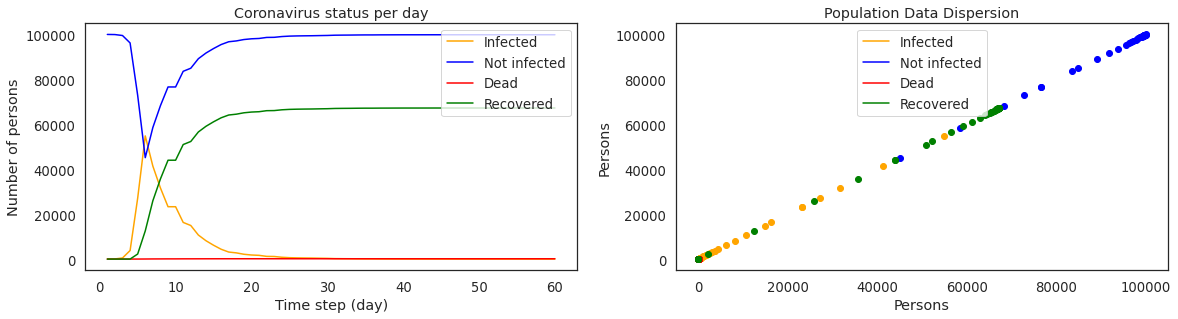

In [29]:
run_simulation(100000, 0.675, 10, 0)

### With quarantine

Desviación: 47139.82157866019
day: 1, infected: 2, dead: 0, recovered: 0
day: 2, infected: 5, dead: 0, recovered: 0
day: 3, infected: 13, dead: 0, recovered: 0
day: 4, infected: 30, dead: 0, recovered: 0
day: 5, infected: 56, dead: 0, recovered: 9
day: 6, infected: 118, dead: 0, recovered: 21
day: 7, infected: 280, dead: 0, recovered: 21
day: 8, infected: 481, dead: 1, recovered: 191
day: 9, infected: 1058, dead: 1, recovered: 248
day: 10, infected: 1936, dead: 2, recovered: 781
day: 11, infected: 3618, dead: 3, recovered: 1716
day: 12, infected: 6422, dead: 8, recovered: 3782
day: 13, infected: 10642, dead: 21, recovered: 8254
day: 14, infected: 24618, dead: 23, recovered: 8696
day: 15, infected: 42725, dead: 46, recovered: 23800
day: 16, infected: 33915, dead: 68, recovered: 33566
day: 17, infected: 31989, dead: 72, recovered: 35488
day: 18, infected: 27551, dead: 85, recovered: 39913
day: 19, infected: 23408, dead: 96, recovered: 44045
day: 20, infected: 18638, dead: 107, recovered:

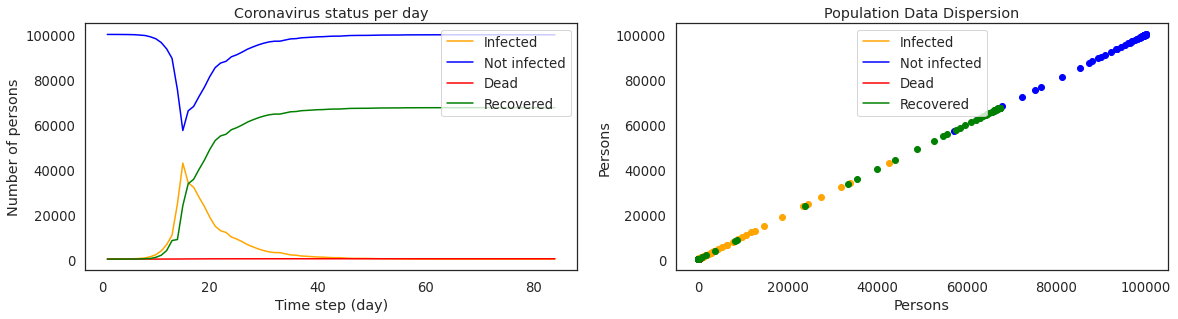

In [32]:
run_simulation(100000, 0.675, 2, 0)

### With vaccine

Desviación: 47137.97147152324
day: 1, infected: 4, dead: 0, recovered: 0
day: 2, infected: 28, dead: 0, recovered: 0
day: 3, infected: 171, dead: 0, recovered: 0
day: 4, infected: 1049, dead: 0, recovered: 0
day: 5, infected: 5222, dead: 0, recovered: 1333
day: 6, infected: 32128, dead: 2, recovered: 1977
day: 7, infected: 39345, dead: 32, recovered: 13374
day: 8, infected: 35428, dead: 39, recovered: 17284
day: 9, infected: 29142, dead: 50, recovered: 23559
day: 10, infected: 28829, dead: 51, recovered: 23871
day: 11, infected: 23511, dead: 62, recovered: 29178
day: 12, infected: 19628, dead: 66, recovered: 33057
day: 13, infected: 18710, dead: 70, recovered: 33971
day: 14, infected: 18037, dead: 71, recovered: 34643
day: 15, infected: 18037, dead: 71, recovered: 34643
day: 16, infected: 13961, dead: 79, recovered: 38711
day: 17, infected: 11540, dead: 81, recovered: 41130
day: 18, infected: 8081, dead: 88, recovered: 44582
day: 19, infected: 7041, dead: 89, recovered: 45621
day: 20, 

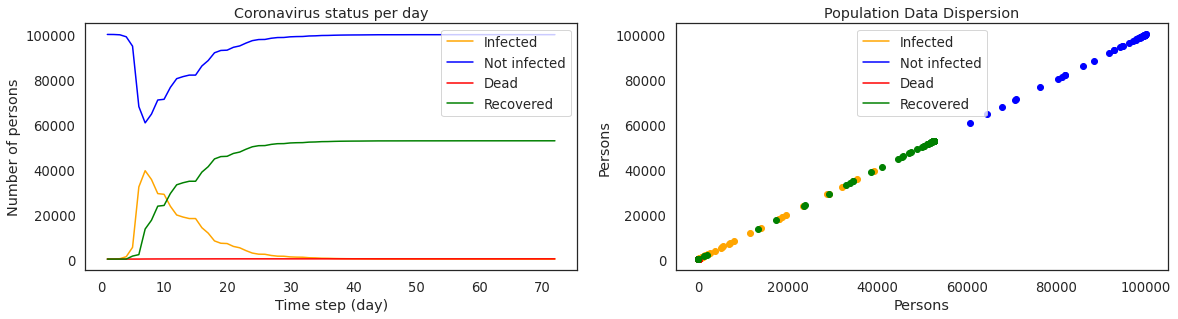

In [42]:
run_simulation(100000, 0.675, 10, 0.15)